# Klasterisasi Daerah Rawan Banjir di Provinsi DKI Jakarta Menggunakan Metode Hierarchical Clustering (Data Mining)

Kelompok 2:
* Rheinka elyana s (21083010021)
* Edina Alana N. (21083010022)
* Ellexia Leonie G. (21083010027)
* Angela Lisanthoni (21083010032) 
* Gema K. Ma'rifah (21083010034)
* Alyssa amorita A. (21083010057)

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage
import math
import geopandas as gpd

In [123]:
#1 filering data yg 0 semua
#2 filtering data yang cuma ada 1 nilai di satu kolom dari 4 kolom
#3 baru di PCA

## Menggabungkan Dataset dan Import Dataset

In [124]:
januari = pd.read_csv('januari.csv')
januari['tanggal_kejadian'] = 1
januari.to_csv('januari.csv', index=False)

februari = pd.read_csv('februari.csv')
februari['tanggal_kejadian'] = 2
februari.to_csv('februari.csv', index=False)

maret = pd.read_csv('maret.csv')
maret['tanggal_kejadian'] = 3
maret.to_csv('maret.csv', index=False)

april = pd.read_csv('april.csv')
april['tanggal_kejadian'] = 4
april.to_csv('april.csv', index=False)

mei = pd.read_csv('mei.csv')
mei['tanggal_kejadian'] = 5
mei.to_csv('mei.csv', index=False)

juni = pd.read_csv('juni.csv')
juni['tanggal_kejadian'] = 6
juni.to_csv('juni.csv', index=False)

juli = pd.read_csv('juli.csv')
juli['tanggal_kejadian'] = 7
juli.to_csv('juli.csv', index=False)

agustus = pd.read_csv('agustus.csv')
agustus['tanggal_kejadian'] = 8
agustus.to_csv('agustus.csv', index=False)

september = pd.read_csv('september.csv')
september['tanggal_kejadian'] = 9
september.to_csv('september.csv', index=False)

oktober = pd.read_csv('oktober.csv')
oktober['tanggal_kejadian'] = 10
oktober.to_csv('oktober.csv', index=False)

november = pd.read_csv('november.csv')
november['tanggal_kejadian'] = 11
november.to_csv('november.csv', index=False)

desember = pd.read_csv('desember.csv')
desember['tanggal_kejadian'] = 12
desember.to_csv('desember.csv', index=False)

In [125]:
# Daftar nama file CSV yang akan digabungkan
file_names = ['januari.csv', 'februari.csv', 'maret.csv', 'april.csv', 'mei.csv', 'juni.csv', 'juli.csv', 'agustus.csv', 'september.csv', 'oktober.csv', 'november.csv', 'desember.csv']

# Membuat daftar kosong untuk menyimpan data dari setiap file CSV
dataframes = []

# Membaca setiap file CSV dan menyimpannya sebagai dataframe
for file_name in file_names:
    dataframe = pd.read_csv(file_name)
    dataframes.append(dataframe)

# Menggabungkan data dari semua dataframe menjadi satu dataframe
merged_dataframe = pd.concat(dataframes)

# Menyimpan dataframe hasil penggabungan ke file CSV baru
merged_dataframe.to_csv('gabungan.csv', index=False)


In [126]:
df = pd.read_csv('gabungan.csv')
df

,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian
0,Jakarta Pusat,JOHAR BARU,JOHAR BARU,"RW 01, 02, 06, 08",4,4,35,140,10 s/d 30 cm,1,0,0,0,0,140,1,0,0
1,Jakarta Pusat,KEMAYORAN,GUNUNG SAHARI SELATAN,"RW 01, 02, 07, 08",4,4,0,0,10 s/d 70 cm,1,0,0,0,0,0,0,0,0
2,Jakarta Pusat,KEMAYORAN,SERDANG,"RW 01, 02, 06, 07",4,4,0,0,10 s/d 30 cm,1,1,0,0,0,0,0,0,0
3,Jakarta Pusat,SAWAH BESAR,PASAR BARU,"RW 02, 03, 04, 05, 06, 07, 08",7,7,155,625,10 s/d 70 cm,1,0,0,0,0,625,5,0,0
4,Jakarta Pusat,TANAH ABANG,BENDUNGAN HILIR,"RW 07, 09",2,2,52,195,31 s/d 70 cm,1,0,0,0,0,195,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,Kepulauan Seribu,KEPULAUAN SERIBU UTARA,PULAU HARAPAN,0,0,1,0,0,10 s/d 15 cm,12,0,0,0,0,0,0,0,0
1002,Kepulauan Seribu,KEPULAUAN SERIBU UTARA,PULAU HARAPAN,0,0,1,0,0,5 s/d 20 cm,12,0,0,0,0,0,0,0,0
1003,Kepulauan Seribu,KEPULAUAN SERIBU UTARA,PULAU HARAPAN,0,0,1,0,0,15 cm,12,0,0,0,0,0,0,0,0
1004,Kepulauan Seribu,KEPULAUAN SERIBU UTARA,PULAU HARAPAN,RW : 02,1,1,0,0,5 cm,12,0,0,0,0,0,0,0,0


## Pre-Processing

### Duplikasi Data

In [127]:
df.duplicated().sum()

90

In [128]:
df.drop_duplicates(inplace=True)

In [129]:
df.shape

(916, 18)

In [130]:
df

,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian
0,Jakarta Pusat,JOHAR BARU,JOHAR BARU,"RW 01, 02, 06, 08",4,4,35,140,10 s/d 30 cm,1,0,0,0,0,140,1,0,0
1,Jakarta Pusat,KEMAYORAN,GUNUNG SAHARI SELATAN,"RW 01, 02, 07, 08",4,4,0,0,10 s/d 70 cm,1,0,0,0,0,0,0,0,0
2,Jakarta Pusat,KEMAYORAN,SERDANG,"RW 01, 02, 06, 07",4,4,0,0,10 s/d 30 cm,1,1,0,0,0,0,0,0,0
3,Jakarta Pusat,SAWAH BESAR,PASAR BARU,"RW 02, 03, 04, 05, 06, 07, 08",7,7,155,625,10 s/d 70 cm,1,0,0,0,0,625,5,0,0
4,Jakarta Pusat,TANAH ABANG,BENDUNGAN HILIR,"RW 07, 09",2,2,52,195,31 s/d 70 cm,1,0,0,0,0,195,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,Kepulauan Seribu,KEPULAUAN SERIBU UTARA,PULAU HARAPAN,0,0,1,0,0,5 s/d 10 cm,12,0,0,0,0,0,0,0,0
1001,Kepulauan Seribu,KEPULAUAN SERIBU UTARA,PULAU HARAPAN,0,0,1,0,0,10 s/d 15 cm,12,0,0,0,0,0,0,0,0
1002,Kepulauan Seribu,KEPULAUAN SERIBU UTARA,PULAU HARAPAN,0,0,1,0,0,5 s/d 20 cm,12,0,0,0,0,0,0,0,0
1003,Kepulauan Seribu,KEPULAUAN SERIBU UTARA,PULAU HARAPAN,0,0,1,0,0,15 cm,12,0,0,0,0,0,0,0,0


### Missing Value

In [131]:
#Cek nilai Null
print(df.isna().sum())

kota_administrasi             0
kecamatan                     0
kelurahan                     0
rw                            0
jumlah_terdampak_rw           0
jumlah_terdampak_rt           0
jumlah_terdampak_kk           0
jumlah_terdampak_jiwa         0
ketinggian_air                0
tanggal_kejadian              0
lama_genangan                 0
jumlah_meninggal              0
jumlah_hilang                 0
jumlah_luka_berat             0
jumlah_luka_ringan            0
jumlah_pengungsi_tertinggi    0
jumlah_tempat_pengungsian     0
nilai_kerugian                0
dtype: int64


### Ubah Format Data yang Sesuai

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 916 entries, 0 to 1004
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   kota_administrasi           916 non-null    object
 1   kecamatan                   916 non-null    object
 2   kelurahan                   916 non-null    object
 3   rw                          916 non-null    object
 4   jumlah_terdampak_rw         916 non-null    int64 
 5   jumlah_terdampak_rt         916 non-null    int64 
 6   jumlah_terdampak_kk         916 non-null    object
 7   jumlah_terdampak_jiwa       916 non-null    int64 
 8   ketinggian_air              916 non-null    object
 9   tanggal_kejadian            916 non-null    int64 
 10  lama_genangan               916 non-null    int64 
 11  jumlah_meninggal            916 non-null    int64 
 12  jumlah_hilang               916 non-null    int64 
 13  jumlah_luka_berat           916 non-null    int64

In [133]:
df['jumlah_terdampak_kk'] = pd.to_numeric(df['jumlah_terdampak_kk'], errors='coerce').fillna(0).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 916 entries, 0 to 1004
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   kota_administrasi           916 non-null    object
 1   kecamatan                   916 non-null    object
 2   kelurahan                   916 non-null    object
 3   rw                          916 non-null    object
 4   jumlah_terdampak_rw         916 non-null    int64 
 5   jumlah_terdampak_rt         916 non-null    int64 
 6   jumlah_terdampak_kk         916 non-null    int32 
 7   jumlah_terdampak_jiwa       916 non-null    int64 
 8   ketinggian_air              916 non-null    object
 9   tanggal_kejadian            916 non-null    int64 
 10  lama_genangan               916 non-null    int64 
 11  jumlah_meninggal            916 non-null    int64 
 12  jumlah_hilang               916 non-null    int64 
 13  jumlah_luka_berat           916 non-null    int64

### Typo Dan Kesalahan Penulisan Data (Khusus Kecamatan)

In [134]:
df['kecamatan'].unique()

array(['JOHAR BARU', 'KEMAYORAN', 'SAWAH BESAR', 'TANAH ABANG',
       'CILINCING', 'KELAPA GADING', 'KOJA', 'PENJARINGAN', 'PADEMANGAN',
       'CENGKARENG', 'GROGOL PETAMBURAN', 'KALIDERES', 'KEBON JERUK',
       'KEMBANGAN', 'PALMERAH', 'CILANDAK', 'JAGAKARSA', 'KEBAYORAN BARU',
       'KEBAYORAN LAMA', 'MAMPANG PRAPATAN', 'PANCORAN', 'PASAR MINGGU',
       'PESANGGRAHAN', 'SETIABUDI', 'TEBET', 'CAKUNG', 'CIPAYUNG',
       'CIRACAS', 'DUREN SAWIT', 'JATINEGARA', 'KRAMAT JATI', 'MAKASAR',
       'MATRAMAN', 'PASAR REBO', 'PULOGADUNG', 'SENEN', 'MENTENG',
       'CEMPAKA PUTIH', 'GAMBIR', 'TANJUNG PRIOK', 'CILIINCING',
       'TAMAN SARI', 'TAMBORA', 'KEPULAUAN SERIBU SELATAN',
       'KEPULAUAN SERIBU UTARA', 'PULO GADUNG', 'MAMPANG'], dtype=object)

In [135]:
df.loc[df['kecamatan'] == 'CILIINCING', 'kecamatan'] = 'CILINCING'
df.loc[df['kecamatan'] == 'PULOGADUNG', 'kecamatan'] = 'PULO GADUNG'
df.loc[df['kecamatan'] == 'MAMPANG', 'kecamatan'] = 'MAMPANG PRAPATAN'

df['kecamatan'].unique()

array(['JOHAR BARU', 'KEMAYORAN', 'SAWAH BESAR', 'TANAH ABANG',
       'CILINCING', 'KELAPA GADING', 'KOJA', 'PENJARINGAN', 'PADEMANGAN',
       'CENGKARENG', 'GROGOL PETAMBURAN', 'KALIDERES', 'KEBON JERUK',
       'KEMBANGAN', 'PALMERAH', 'CILANDAK', 'JAGAKARSA', 'KEBAYORAN BARU',
       'KEBAYORAN LAMA', 'MAMPANG PRAPATAN', 'PANCORAN', 'PASAR MINGGU',
       'PESANGGRAHAN', 'SETIABUDI', 'TEBET', 'CAKUNG', 'CIPAYUNG',
       'CIRACAS', 'DUREN SAWIT', 'JATINEGARA', 'KRAMAT JATI', 'MAKASAR',
       'MATRAMAN', 'PASAR REBO', 'PULO GADUNG', 'SENEN', 'MENTENG',
       'CEMPAKA PUTIH', 'GAMBIR', 'TANJUNG PRIOK', 'TAMAN SARI',
       'TAMBORA', 'KEPULAUAN SERIBU SELATAN', 'KEPULAUAN SERIBU UTARA'],
      dtype=object)

In [136]:
df['kota_administrasi'].unique()

array(['Jakarta Pusat', 'Jakarta Utara', 'Jakarta Barat',
       'Jakarta Selatan', 'Jakarta Timur', 'Kepulauan Seribu',
       'Jakarta Urata'], dtype=object)

In [137]:
df.loc[df['kota_administrasi'] == 'Jakarta Urata', 'kota_administrasi'] = 'Jakarta Utara'
df['kota_administrasi'].unique()

array(['Jakarta Pusat', 'Jakarta Utara', 'Jakarta Barat',
       'Jakarta Selatan', 'Jakarta Timur', 'Kepulauan Seribu'],
      dtype=object)

### Reset Index

In [138]:
df = df.reset_index()
df

,index,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian
0,0,Jakarta Pusat,JOHAR BARU,JOHAR BARU,"RW 01, 02, 06, 08",4,4,35,140,10 s/d 30 cm,1,0,0,0,0,140,1,0,0
1,1,Jakarta Pusat,KEMAYORAN,GUNUNG SAHARI SELATAN,"RW 01, 02, 07, 08",4,4,0,0,10 s/d 70 cm,1,0,0,0,0,0,0,0,0
2,2,Jakarta Pusat,KEMAYORAN,SERDANG,"RW 01, 02, 06, 07",4,4,0,0,10 s/d 30 cm,1,1,0,0,0,0,0,0,0
3,3,Jakarta Pusat,SAWAH BESAR,PASAR BARU,"RW 02, 03, 04, 05, 06, 07, 08",7,7,155,625,10 s/d 70 cm,1,0,0,0,0,625,5,0,0
4,4,Jakarta Pusat,TANAH ABANG,BENDUNGAN HILIR,"RW 07, 09",2,2,52,195,31 s/d 70 cm,1,0,0,0,0,195,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,1000,Kepulauan Seribu,KEPULAUAN SERIBU UTARA,PULAU HARAPAN,0,0,1,0,0,5 s/d 10 cm,12,0,0,0,0,0,0,0,0
912,1001,Kepulauan Seribu,KEPULAUAN SERIBU UTARA,PULAU HARAPAN,0,0,1,0,0,10 s/d 15 cm,12,0,0,0,0,0,0,0,0
913,1002,Kepulauan Seribu,KEPULAUAN SERIBU UTARA,PULAU HARAPAN,0,0,1,0,0,5 s/d 20 cm,12,0,0,0,0,0,0,0,0
914,1003,Kepulauan Seribu,KEPULAUAN SERIBU UTARA,PULAU HARAPAN,0,0,1,0,0,15 cm,12,0,0,0,0,0,0,0,0


## Feature Engineering

### Ekstraksi Fitur/Pengurangan Dimensi (Using PCA)

In [139]:
# Menerapkan PCA untuk mengurangi dimensi menjadi 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df[["jumlah_terdampak_rw","jumlah_terdampak_rt","jumlah_terdampak_kk","jumlah_terdampak_jiwa"]])

# Mendapatkan loadings dari PCA
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=['jumlah_terdampak_rw','jumlah_terdampak_rt','jumlah_terdampak_kk','jumlah_terdampak_jiwa'])

# Menampilkan loadings
print(loadings)

# Membuat DataFrame baru dengan fitur baru dan kolom Klaster
df_reduction = pd.DataFrame({'jumlah_terdampak_jiwa': X_pca[:, 0], 'jumlah_terdampak_kk': X_pca[:, 1]})
df_reduction

                            PC1       PC2
jumlah_terdampak_rw    0.001312 -0.003047
jumlah_terdampak_rt    0.003391  0.015878
jumlah_terdampak_kk    0.276506  0.960872
jumlah_terdampak_jiwa  0.961005 -0.276519


,jumlah_terdampak_jiwa,jumlah_terdampak_kk
0,-27.275209,-3.901161
1,-171.493664,1.181010
2,-171.493664,1.181010
3,472.007203,-22.669853
4,30.271277,-2.800554
...,...,...
911,-171.509088,1.145566
912,-171.509088,1.145566
913,-171.509088,1.145566
914,-171.509088,1.145566


In [140]:
# Menerapkan PCA untuk mengurangi dimensi menjadi 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df[["jumlah_terdampak_rw","jumlah_terdampak_rt","jumlah_terdampak_kk","jumlah_terdampak_jiwa"]])

# Mendapatkan loadings dari PCA
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=['jumlah_terdampak_rw','jumlah_terdampak_rt','jumlah_terdampak_kk','jumlah_terdampak_jiwa'])

# Menampilkan loadings
print(loadings)

# Membuat DataFrame baru dengan fitur baru dan kolom Klaster
df_reduction = pd.DataFrame({'jumlah_terdampak_jiwa': X_pca[:, 0], 'jumlah_terdampak_kk': X_pca[:, 1]})
df_reduction

                            PC1       PC2
jumlah_terdampak_rw    0.001312 -0.003047
jumlah_terdampak_rt    0.003391  0.015878
jumlah_terdampak_kk    0.276506  0.960872
jumlah_terdampak_jiwa  0.961005 -0.276519


,jumlah_terdampak_jiwa,jumlah_terdampak_kk
0,-27.275209,-3.901161
1,-171.493664,1.181010
2,-171.493664,1.181010
3,472.007203,-22.669853
4,30.271277,-2.800554
...,...,...
911,-171.509088,1.145566
912,-171.509088,1.145566
913,-171.509088,1.145566
914,-171.509088,1.145566


In [141]:
df2=df[['kecamatan']]

In [142]:
df_merged1 = pd.concat([df2, df_reduction], axis=1)
df_merged1

,kecamatan,jumlah_terdampak_jiwa,jumlah_terdampak_kk
0,JOHAR BARU,-27.275209,-3.901161
1,KEMAYORAN,-171.493664,1.181010
2,KEMAYORAN,-171.493664,1.181010
3,SAWAH BESAR,472.007203,-22.669853
4,TANAH ABANG,30.271277,-2.800554
...,...,...,...
911,KEPULAUAN SERIBU UTARA,-171.509088,1.145566
912,KEPULAUAN SERIBU UTARA,-171.509088,1.145566
913,KEPULAUAN SERIBU UTARA,-171.509088,1.145566
914,KEPULAUAN SERIBU UTARA,-171.509088,1.145566


In [143]:
# Menghitung jumlah_terdampak_jiwa sesuai kecamatan yang koresponden
df_final = df_merged1.groupby('kecamatan').mean().reset_index()

# Menampilkan hasil
df_final

,kecamatan,jumlah_terdampak_jiwa,jumlah_terdampak_kk
0,CAKUNG,141.571614,-0.128639
1,CEMPAKA PUTIH,-171.501048,1.162526
2,CENGKARENG,177.392134,-11.237573
3,CILANDAK,-138.973612,0.007610
4,CILINCING,100.598021,2.210224
5,CIPAYUNG,-154.326834,1.891663
6,CIRACAS,7.295867,5.550171
7,DUREN SAWIT,10.465539,-9.320051
8,GAMBIR,-171.507775,1.142519
9,GROGOL PETAMBURAN,-143.762546,0.178453


In [144]:
df_dampak1 = df_final[['jumlah_terdampak_jiwa','jumlah_terdampak_kk']]
df_dampak1

,jumlah_terdampak_jiwa,jumlah_terdampak_kk
0,141.571614,-0.128639
1,-171.501048,1.162526
2,177.392134,-11.237573
3,-138.973612,0.007610
4,100.598021,2.210224
5,-154.326834,1.891663
6,7.295867,5.550171
7,10.465539,-9.320051
8,-171.507775,1.142519
9,-143.762546,0.178453


## EDA (Menggunakan df)

### Statistika Deskriptif

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   index                       916 non-null    int64 
 1   kota_administrasi           916 non-null    object
 2   kecamatan                   916 non-null    object
 3   kelurahan                   916 non-null    object
 4   rw                          916 non-null    object
 5   jumlah_terdampak_rw         916 non-null    int64 
 6   jumlah_terdampak_rt         916 non-null    int64 
 7   jumlah_terdampak_kk         916 non-null    int32 
 8   jumlah_terdampak_jiwa       916 non-null    int64 
 9   ketinggian_air              916 non-null    object
 10  tanggal_kejadian            916 non-null    int64 
 11  lama_genangan               916 non-null    int64 
 12  jumlah_meninggal            916 non-null    int64 
 13  jumlah_hilang               916 non-null    int64 

In [146]:
df.shape

(916, 19)

In [147]:
df.describe()

,index,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,tanggal_kejadian,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian
count,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.0,916.0,916.0,916.000000,916.000000,916.000000,916.0
mean,474.426856,2.037118,3.629913,46.293668,165.136463,6.301310,0.020742,0.0,0.0,0.0,98.530568,1.454148,0.013100,0.0
std,286.535797,2.389123,5.559174,206.817498,711.542445,4.118841,0.157181,0.0,0.0,0.0,375.088452,11.138624,0.147262,0.0
min,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
25%,228.750000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
50%,457.500000,1.000000,1.000000,0.000000,0.000000,8.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
75%,719.250000,3.000000,4.000000,8.000000,27.250000,10.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
max,1004.000000,15.000000,46.000000,3762.000000,13450.000000,12.000000,2.000000,0.0,0.0,0.0,4461.000000,271.000000,3.000000,0.0


In [148]:
df.describe(include='object')

,kota_administrasi,kecamatan,kelurahan,rw,ketinggian_air
count,916,916,916,916,916
unique,6,44,220,356,183
top,Jakarta Timur,JATINEGARA,KAMPUNG MELAYU,0,20 cm
freq,342,84,57,180,64


### Tidak Perlu Mengecek data berdistribusi normal atau tidak

Untuk melakukan hierarchical clustering, tidak ada asumsi yang memerlukan data memiliki distribusi normal. Hierarchical clustering adalah metode yang digunakan untuk mengelompokkan objek berdasarkan kesamaan jarak atau kesamaan atributnya. Metode ini tidak bergantung pada distribusi normal data.

### Visualisasi Data

C:\Users\angela\coba\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\angela\coba\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\angela\coba\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

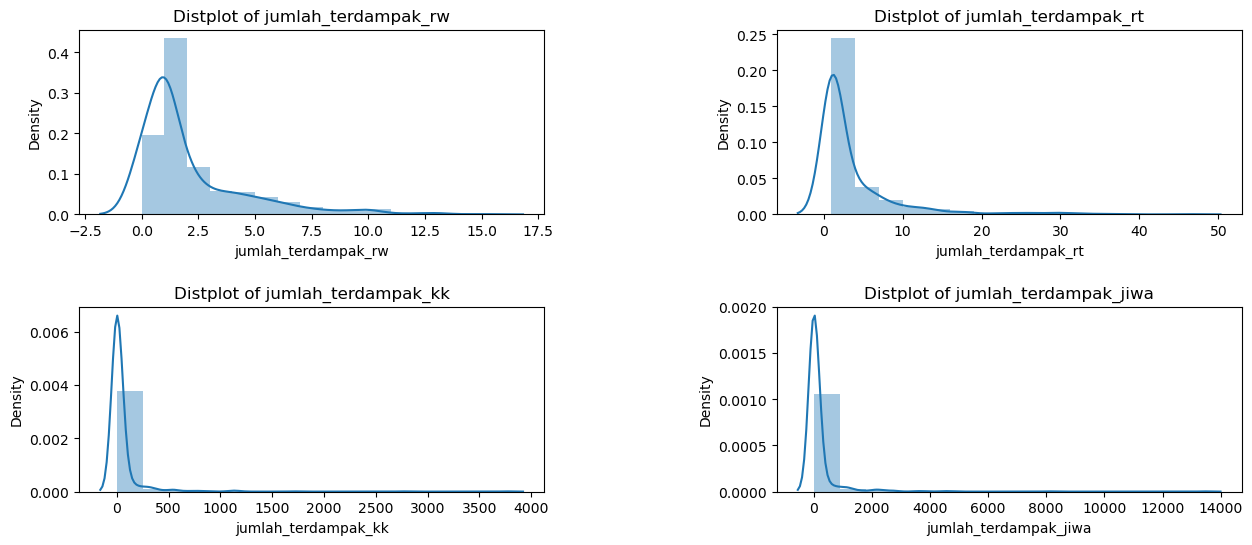

In [149]:
# grafik distribusi variabel prediktor
plt.figure(1 , figsize = (15 , 6))
graph = 0 
# for loop
for x in ['jumlah_terdampak_rw' , 'jumlah_terdampak_rt' , 'jumlah_terdampak_kk', 'jumlah_terdampak_jiwa']:
    graph += 1
    
    # ploting graph
    plt.subplot(2 , 2 , graph)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))
# showing the graph
plt.show()

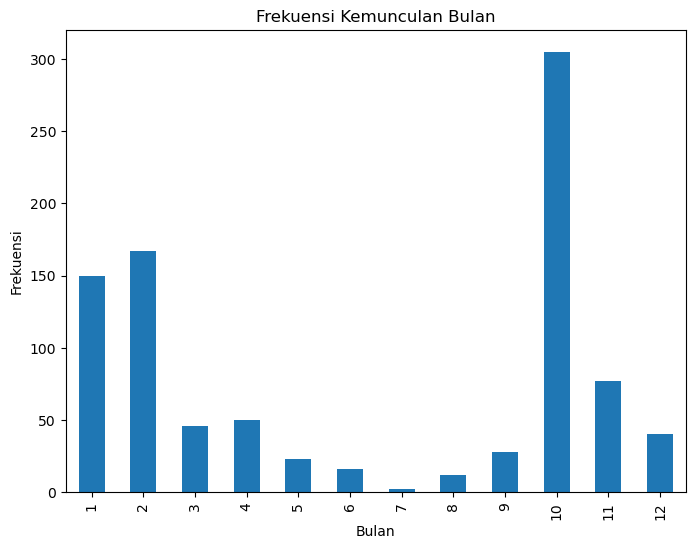

In [150]:
# Menghitung frekuensi kemunculan setiap bulan
bulan_counts = df['tanggal_kejadian'].value_counts().sort_index()

# Mengatur ukuran figure
plt.figure(figsize=(8, 6))

# Menggambar bar chart
bulan_counts.plot(kind='bar')

# Memberikan judul dan label sumbu
plt.title('Frekuensi Kemunculan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Frekuensi')

# Menampilkan bar chart
plt.show()


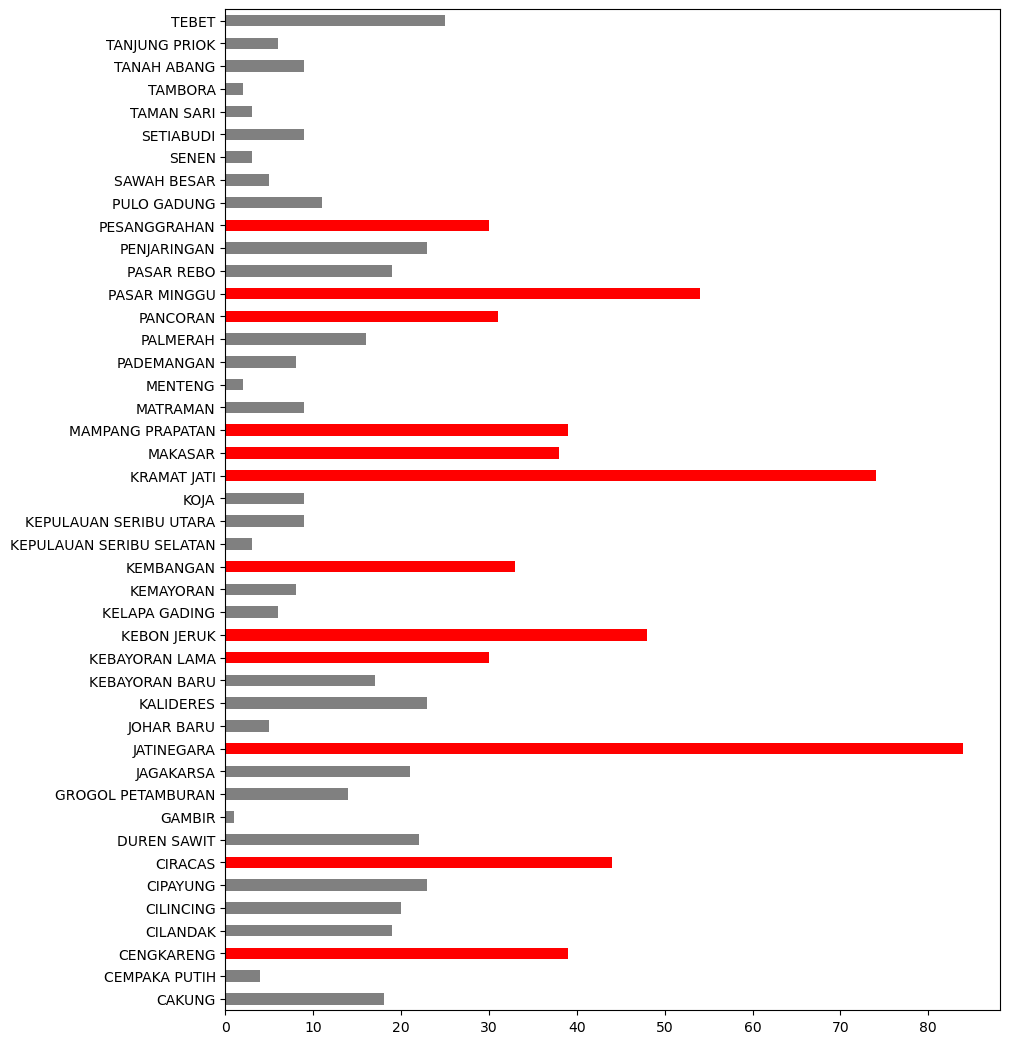

In [151]:
#Hitung frekuensi banyaknya kecamatan yang muncul dalam dataset
kecamatan_counts = df['kecamatan'].value_counts().sort_index()
colors = ["red" if i >= 30 else "grey" for i in kecamatan_counts]
kecamatan_counts.plot.barh(figsize=(10,13), color=colors)
plt.show()

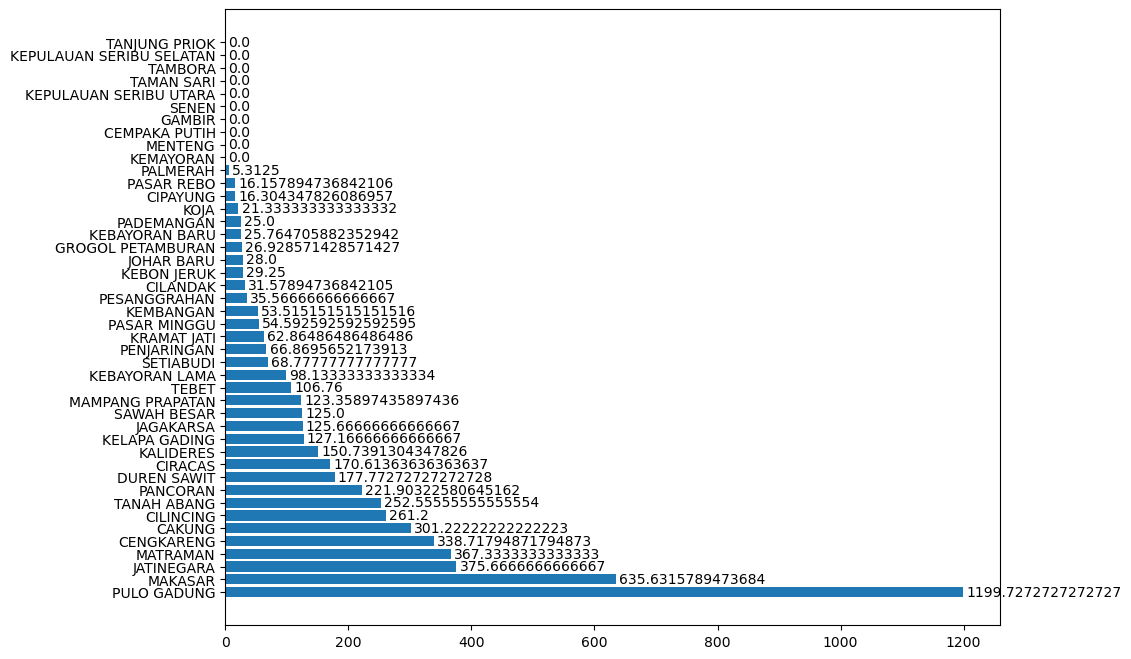

In [152]:
# Menghitung jumlah terdampak jiwa tiap kecamatan
jumlah_terdampak = df.groupby('kecamatan')['jumlah_terdampak_jiwa'].mean().reset_index()

# Mengurutkan kecamatan berdasarkan jumlah terdampak jiwa secara menurun
jumlah_terdampak = jumlah_terdampak.sort_values('jumlah_terdampak_jiwa', ascending=False)

# Membuat visualisasi barh
plt.figure(figsize=(10, 8))  # Ukuran plot

# Menggambar barh untuk tiap kecamatan
plt.barh(jumlah_terdampak['kecamatan'], jumlah_terdampak['jumlah_terdampak_jiwa'])

# Menambahkan label nilai di atas setiap barh
for i, v in enumerate(jumlah_terdampak['jumlah_terdampak_jiwa']):
    plt.text(v + 5, i, str(v), ha='left', va='center')

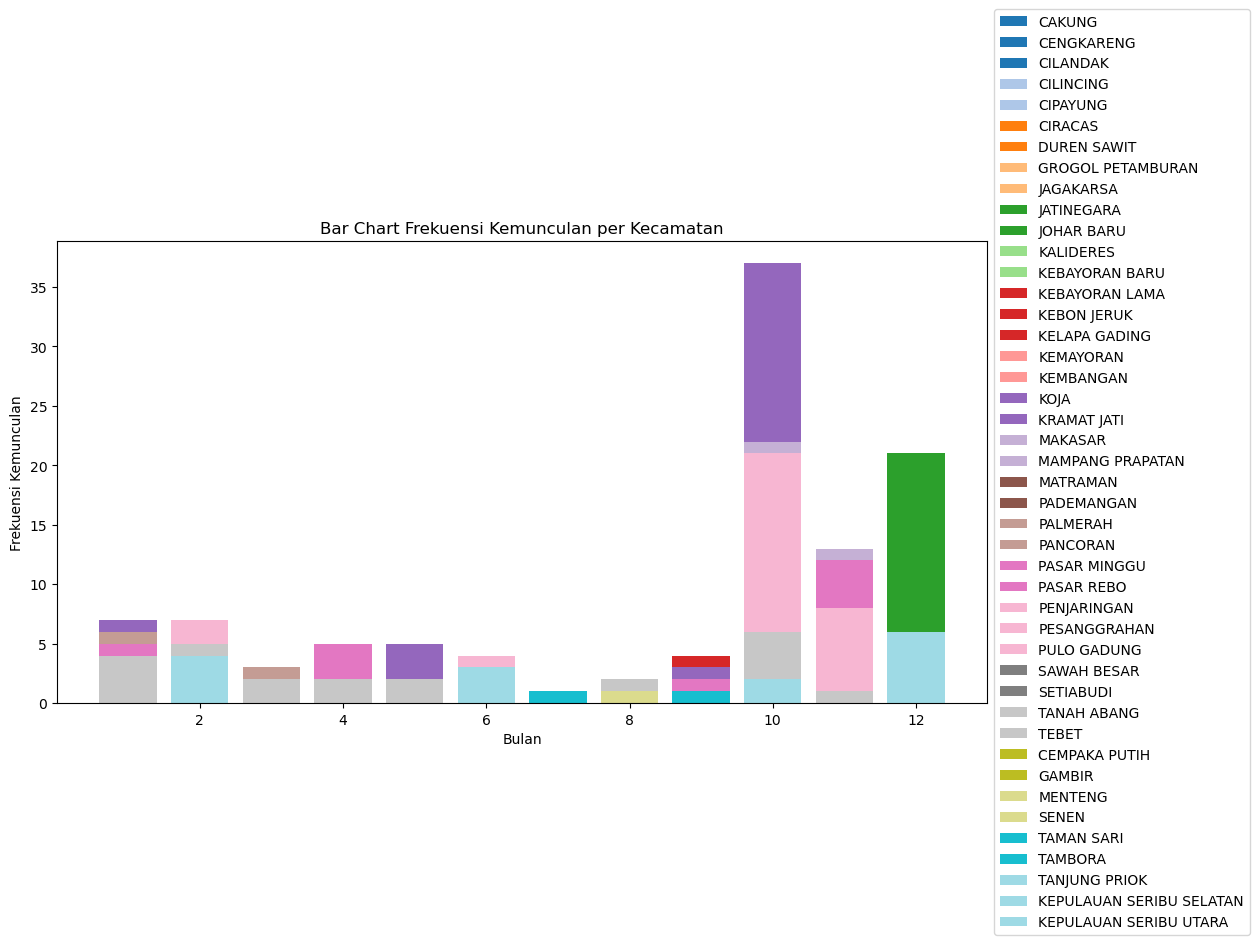

In [153]:
# Menghitung frekuensi kemunculan setiap bulan dan kecamatan
frekuensi = df.groupby(['tanggal_kejadian', 'kecamatan']).size().reset_index(name='frekuensi')

# Mendapatkan daftar kecamatan yang unik
kecamatan = frekuensi['kecamatan'].unique()

# Mengatur warna unik untuk setiap kecamatan
colors = plt.cm.get_cmap('tab20', len(kecamatan))

# Membuat bar chart
plt.figure(figsize=(12, 6))  # Ukuran plot

# Loop melalui setiap kecamatan
for i, k in enumerate(kecamatan):
    # Filter data untuk kecamatan tertentu
    data_kecamatan = frekuensi[frekuensi['kecamatan'] == k]
    
    # Mengatur sumbu x dan y
    x = data_kecamatan['tanggal_kejadian']
    y = data_kecamatan['frekuensi']
    
    # Menggambar bar chart dengan warna unik untuk setiap kecamatan
    plt.bar(x, y, color=colors(i), label=k)


# Memberi label sumbu x dan y, serta judul plot
plt.xlabel('Bulan')
plt.ylabel('Frekuensi Kemunculan')
plt.title('Bar Chart Frekuensi Kemunculan per Kecamatan')

# Menampilkan legenda di sisi kanan plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Menampilkan plot
plt.show()


Text(0.5, 1.0, 'Matrix Correlation for Numeric Features ')

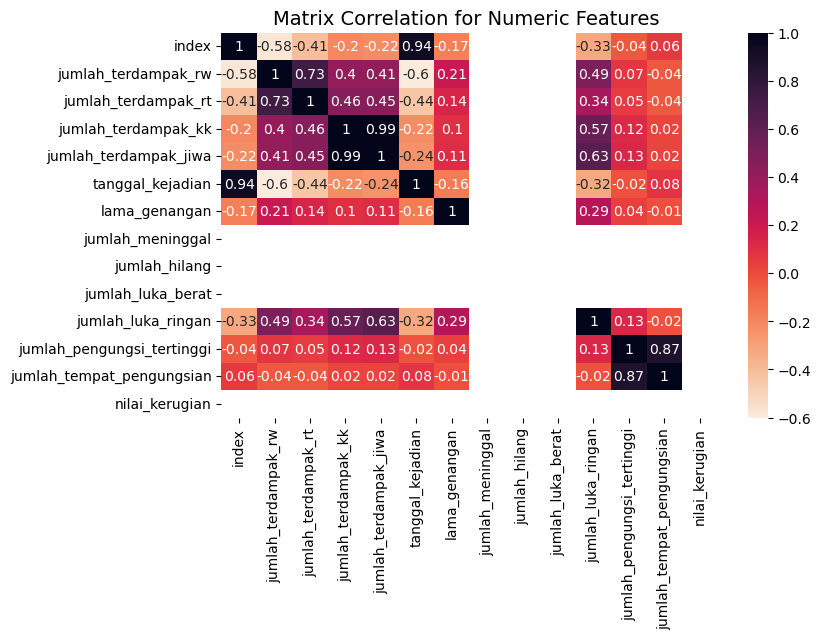

In [154]:
plt.figure(figsize = (8,5))
correlation_matrix = df.corr().round(2)

sns.heatmap(data = correlation_matrix, annot = True, cmap = 'rocket_r')
plt.title("Matrix Correlation for Numeric Features ", size = 14)

## Pemodelan Data

### DARI SCRATCH

sumber: https://github.com/OlaPietka/Agglomerative-Hierarchical-Clustering-from-scratch

In [155]:
def distance(p, q): #menghitung jarak antar titik berdasarkan ecluidean
    return math.sqrt(sum([(pi - qi)**2 for pi, qi in zip(p, q)]))

def single_link(ci, cj): #menghitung berbasis single linkage
    return min([distance(vi, vj) for vi in ci for vj in cj])

def complete_link(ci, cj): #menghitung berbasis complete_link
    return max([distance(vi, vj) for vi in ci for vj in cj])

def average_link(ci, cj): #menghitung berbasis average_link
    distances = [distance(vi, vj) for vi in ci for vj in cj]
    return sum(distances) / len(distances)

def get_distance_measure(M): #user dapat memilih tipe perhitungan mana
    if M == 0:
        return single_link
    elif M == 1:
        return complete_link
    else:
        return average_link


In [156]:
class AgglomerativeHierarchicalClustering:
    def __init__(self, data, K, M):
        self.data = data
        self.N = len(data)
        self.K = K
        self.measure = get_distance_measure(M)
        self.clusters = self.init_clusters()

    def init_clusters(self): #setiap point adalah clusternya sendiri
        return {data_id: [data_point] for data_id, data_point in enumerate(self.data)}

    def find_closest_clusters(self): #mencari cluster lain yang terdekat
        min_dist = math.inf
        closest_clusters = None

        clusters_ids = list(self.clusters.keys())

        for i, cluster_i in enumerate(clusters_ids[:-1]):
            for j, cluster_j in enumerate(clusters_ids[i+1:]):
                dist = self.measure(self.clusters[cluster_i], self.clusters[cluster_j])
                if dist < min_dist:
                    min_dist, closest_clusters = dist, (cluster_i, cluster_j)
        return closest_clusters

    def merge_and_form_new_clusters(self, ci_id, cj_id): #gabungkan cluster2 yang berdekatan menjadi satu
        new_clusters = {0: self.clusters[ci_id] + self.clusters[cj_id]}

        for cluster_id in self.clusters.keys():
            if (cluster_id == ci_id) | (cluster_id == cj_id):
                continue
            new_clusters[len(new_clusters.keys())] = self.clusters[cluster_id]
        return new_clusters

    def run_algorithm(self): #menjalankan algoritma
        while len(self.clusters.keys()) > self.K:
            closest_clusters = self.find_closest_clusters()
            self.clusters = self.merge_and_form_new_clusters(*closest_clusters)

    def print(self): #menampilkan hasil clusterisasi
        for id, points in self.clusters.items():
            print("Cluster: {}".format(id))
            for point in points:
                print("    {}".format(point))
    
    def data_frame(self):
        # Membuat list untuk menyimpan nilai kolom
        kolom_1 = []
        kolom_2 = []
        #kolom_3 = []
        #kolom_4 = []
        cluster = []

        # Mengisi list dengan nilai dari hasil klasterisasi
        for cluster_id, points in self.clusters.items():
            for point in points:
                kolom_1.append(point[0])
                kolom_2.append(point[1])
                #kolom_3.append(point[2])
                #kolom_4.append(point[3])
                cluster.append(cluster_id)

        # Membuat DataFrame dari list
        df_baru = pd.DataFrame({
            'jumlah_terdampak_jiwa': kolom_1,
            'jumlah_terdampak_kk': kolom_2,
            #'jumlah_terdampak_kk': kolom_3,
            #'jumlah_terdampak_jiwa': kolom_4,
            'cluster': cluster
        })

        # Menampilkan DataFrame
        return df_baru


In [157]:
dataset = df_dampak1.values

K = 4 #banyak kluster yang dipilih
M = 2 #jenis perhitungan yang dipilih
# 0 adalah single linkage
# 1 adalah complete linkage
# 2 adalah average linkage

agg_hierarchical_clustering = AgglomerativeHierarchicalClustering(dataset, K, M) #memanggil class
agg_hierarchical_clustering.run_algorithm()
agg_hierarchical_clustering.print()

Cluster: 0
    [7.29586685 5.55017055]
    [10.46553854 -9.3200512 ]
    [-16.20861759  -4.26811384]
    [-70.36623619  -2.23848298]
    [-61.33666875  -2.05969911]
    [-41.78537566  -2.48396615]
    [-42.79966015  -3.60334048]
    [-40.70080771  -4.15963383]
    [-45.52536856  -7.13581949]
    [-1.38973612e+02  7.61029790e-03]
    [-1.34864593e+02 -1.30611921e-01]
    [-143.76254577    0.17845258]
    [-1.42659643e+02  1.39524221e-01]
    [-141.21529912    0.64237204]
    [-144.98203694    0.15582326]
    [-145.7512801     0.24537267]
    [-154.32683403    1.89166269]
    [-154.11607632    3.15149126]
    [-150.3214542   -2.3810845]
    [-171.49836803    1.16817928]
    [-171.49836803    1.16817928]
    [-171.50104791    1.16252594]
    [-171.49507248    1.18131034]
    [-171.49800253    1.18316592]
    [-171.50463956    1.15107221]
    [-171.50607962    1.15045745]
    [-171.50329038    1.15585685]
    [-171.50777533    1.14251867]
    [-171.48811989    1.23147578]
    [-166.0324170

In [158]:
# 3 paling rawan
# 2 cukup rawan
# 1 sedang - sedang aja
# 0 tidak rawan

In [159]:
df_baru = agg_hierarchical_clustering.data_frame()
df_baru

,jumlah_terdampak_jiwa,jumlah_terdampak_kk,cluster
0,7.295867,5.550171,0
1,10.465539,-9.320051,0
2,-16.208618,-4.268114,0
3,-70.366236,-2.238483,0
4,-61.336669,-2.059699,0
5,-41.785376,-2.483966,0
6,-42.799660,-3.603340,0
7,-40.700808,-4.159634,0
8,-45.525369,-7.135819,0
9,-138.973612,0.007610,0


In [160]:
gabungan = pd.merge(df_baru, df_final, on=['jumlah_terdampak_jiwa', 'jumlah_terdampak_kk'])
gabungan

,jumlah_terdampak_jiwa,jumlah_terdampak_kk,cluster,kecamatan
0,7.295867,5.550171,0,CIRACAS
1,10.465539,-9.320051,0,DUREN SAWIT
2,-16.208618,-4.268114,0,KALIDERES
3,-70.366236,-2.238483,0,KEBAYORAN LAMA
4,-61.336669,-2.059699,0,TEBET
5,-41.785376,-2.483966,0,JAGAKARSA
6,-42.799660,-3.603340,0,SAWAH BESAR
7,-40.700808,-4.159634,0,KELAPA GADING
8,-45.525369,-7.135819,0,MAMPANG PRAPATAN
9,-138.973612,0.007610,0,CILANDAK


In [161]:
#gabungan.drop_duplicates(inplace=True)

In [162]:
#gabungan.reset_index()

In [163]:
# Menghitung nilai Silhouette score
silhouette_avg_Hierarchical = silhouette_score(gabungan[['jumlah_terdampak_jiwa','jumlah_terdampak_kk']], gabungan[['cluster']])
print("Nilai Silhouette score:", silhouette_avg_Hierarchical)

# Menghitung shadow silhouette untuk setiap sampel
sample_silhouette_Hierarchical = silhouette_samples(gabungan[['jumlah_terdampak_jiwa','jumlah_terdampak_kk']], gabungan[['cluster']])
sample_silhouette_Hierarchical

Nilai Silhouette score: 0.6800773007552159


C:\Users\angela\coba\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\angela\coba\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([ 0.03349458, -0.01437046,  0.31227665,  0.67141309,  0.63208401,
        0.52553614,  0.53219499,  0.51803509,  0.54737325,  0.84031901,
        0.83578827,  0.84368975,  0.84320543,  0.84224495,  0.84396199,
        0.84397395,  0.84140154,  0.841045  ,  0.84224903,  0.82849608,
        0.82849608,  0.82849166,  0.82849598,  0.82848999,  0.82848267,
        0.82847954,  0.82848671,  0.82847096,  0.82846807,  0.83327435,
        0.78022364,  0.77460381,  0.78843614,  0.80917888,  0.80590679,
        0.76759148,  0.77259558,  0.65409677,  0.70059112,  0.69156566,
        0.64849067,  0.43607233,  0.        ,  0.        ])

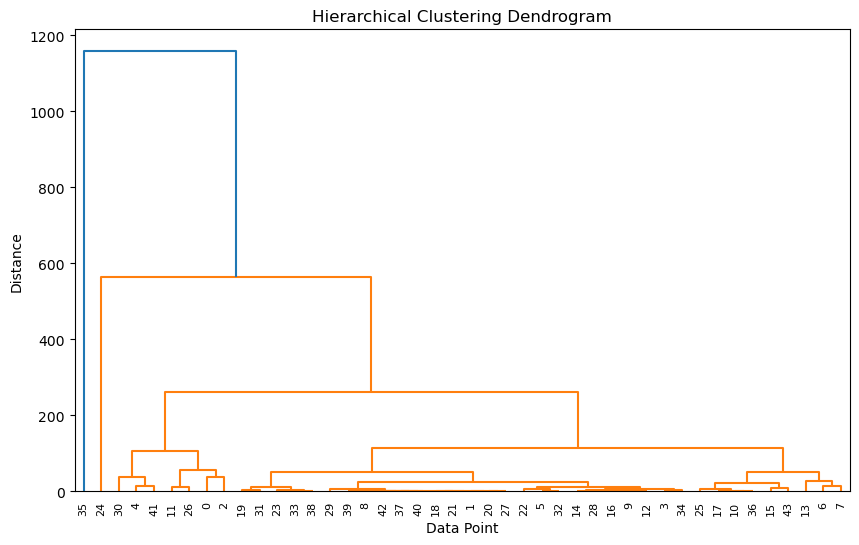

In [164]:
# Menghitung matriks jarak antar data
dist_matrix = pdist(df_dampak1)

# Menggunakan metode linkage untuk menghubungkan klaster
linkage_matrix = linkage(dist_matrix, method='average')

# Membuat dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Point')
plt.ylabel('Distance')
plt.show()

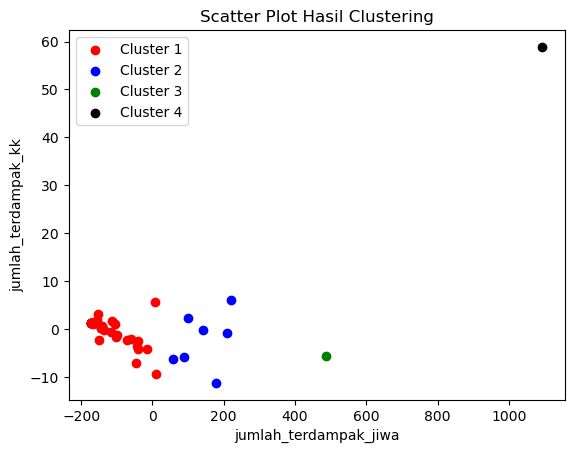

In [165]:
# Menentukan warna untuk setiap cluster
colors = ['red', 'blue', 'green','black']  # Sesuaikan dengan jumlah cluster Anda

clusters = [1,2,3,4]
# Membuat scatter plot untuk setiap cluster
for cluster_id, color in zip(range(len(clusters)), colors):
    cluster_data = gabungan[gabungan['cluster'] == cluster_id]
    plt.scatter(cluster_data['jumlah_terdampak_jiwa'], cluster_data['jumlah_terdampak_kk'], color=color, label=f'Cluster {cluster_id + 1}')

# Menambahkan label dan judul plot
plt.xlabel('jumlah_terdampak_jiwa')
plt.ylabel('jumlah_terdampak_kk')
plt.title('Scatter Plot Hasil Clustering')

# Menampilkan legenda
plt.legend()

# Menampilkan plot
plt.show()


### Visualisasi GeoPandas

In [166]:
# Membaca file geopackage
data = gpd.read_file('Kecamatan-DKI-Jakarta.gpkg')

# Menampilkan informasi data
data.head()

,id,@id,admin_level,boundary,is_in:province,is_in:town,name,type,geometry
0,relation/5802391,relation/5802391,6,administrative,DKI Jakarta,Jakarta Timur,Cipayung,boundary,"POLYGON ((106.91126 -6.29626, 106.91117 -6.296..."
1,relation/5802392,relation/5802392,6,administrative,DKI Jakarta,Jakarta Barat,Kebon Jeruk,boundary,"POLYGON ((106.74951 -6.17554, 106.74936 -6.175..."
2,relation/5802394,relation/5802394,6,administrative,DKI Jakarta,Jakarta Utara,Cilincing,boundary,"POLYGON ((106.96990 -6.09108, 106.96795 -6.092..."
3,relation/5802395,relation/5802395,6,administrative,DKI Jakarta,Jakarta Utara,Pademangan,boundary,"POLYGON ((106.84772 -6.12852, 106.84770 -6.128..."
4,relation/5802396,relation/5802396,6,administrative,DKI Jakarta,Jakarta Timur,Pasar Rebo,boundary,"POLYGON ((106.86975 -6.34810, 106.86985 -6.348..."


In [167]:
# Mengubah nilai dalam kolom menjadi huruf kapital
data['name'] = data['name'].str.upper()
data.head()

,id,@id,admin_level,boundary,is_in:province,is_in:town,name,type,geometry
0,relation/5802391,relation/5802391,6,administrative,DKI Jakarta,Jakarta Timur,CIPAYUNG,boundary,"POLYGON ((106.91126 -6.29626, 106.91117 -6.296..."
1,relation/5802392,relation/5802392,6,administrative,DKI Jakarta,Jakarta Barat,KEBON JERUK,boundary,"POLYGON ((106.74951 -6.17554, 106.74936 -6.175..."
2,relation/5802394,relation/5802394,6,administrative,DKI Jakarta,Jakarta Utara,CILINCING,boundary,"POLYGON ((106.96990 -6.09108, 106.96795 -6.092..."
3,relation/5802395,relation/5802395,6,administrative,DKI Jakarta,Jakarta Utara,PADEMANGAN,boundary,"POLYGON ((106.84772 -6.12852, 106.84770 -6.128..."
4,relation/5802396,relation/5802396,6,administrative,DKI Jakarta,Jakarta Timur,PASAR REBO,boundary,"POLYGON ((106.86975 -6.34810, 106.86985 -6.348..."


In [168]:
#mengecek apakah nama dari kecamatannya sudah sama
sorted(df['kecamatan'].unique()) == sorted(data['name'].unique())

True

In [169]:
#ubah nama kolom
data = data.rename(columns={'name': 'kecamatan'})
data.head()

,id,@id,admin_level,boundary,is_in:province,is_in:town,kecamatan,type,geometry
0,relation/5802391,relation/5802391,6,administrative,DKI Jakarta,Jakarta Timur,CIPAYUNG,boundary,"POLYGON ((106.91126 -6.29626, 106.91117 -6.296..."
1,relation/5802392,relation/5802392,6,administrative,DKI Jakarta,Jakarta Barat,KEBON JERUK,boundary,"POLYGON ((106.74951 -6.17554, 106.74936 -6.175..."
2,relation/5802394,relation/5802394,6,administrative,DKI Jakarta,Jakarta Utara,CILINCING,boundary,"POLYGON ((106.96990 -6.09108, 106.96795 -6.092..."
3,relation/5802395,relation/5802395,6,administrative,DKI Jakarta,Jakarta Utara,PADEMANGAN,boundary,"POLYGON ((106.84772 -6.12852, 106.84770 -6.128..."
4,relation/5802396,relation/5802396,6,administrative,DKI Jakarta,Jakarta Timur,PASAR REBO,boundary,"POLYGON ((106.86975 -6.34810, 106.86985 -6.348..."


In [170]:
#agar kolom cluster muncul di dalam dataframe yang sama
peta_gabungan = data.merge(gabungan[['cluster','kecamatan']], on='kecamatan')

In [171]:
import folium

# Kolom 'cluster' berisi hasil klasterisasi
# Ubah nilai kolom 'cluster' menjadi tipe data string untuk memastikan konsistensi tipe data
peta_gabungan['cluster'] = peta_gabungan['cluster'].astype(str)

# Membuat peta interaktif menggunakan library Folium
m = folium.Map(location=[-6.2088, 106.8456], zoom_start=11)  # Menentukan koordinat awal dan tingkat zoom

# Menentukan skema warna
color_scale = ['green', 'blue', 'yellow', 'red']  # Warna yang akan digunakan

# Menambahkan layer peta kecamatan ke peta interaktif dengan skema warna
folium.GeoJson(
    peta_gabungan,
    name='Kecamatan',
    style_function=lambda feature: {
        'fillColor': color_scale[int(feature['properties']['cluster'])],
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.7
    },
    tooltip=folium.features.GeoJsonTooltip(fields=['kecamatan', 'cluster'], aliases=['Kecamatan', 'Cluster'], labels=True)
).add_to(m)

# Menambahkan custom legend
legend_html = '''
<div style="position: fixed; 
     bottom: 50px; left: 50px; width: 120px; height: 100px; 
     border:2px solid grey; z-index:9999; font-size:14px;
     background-color: white;
     opacity: 0.8;
     ">
     <p style="margin: 0; padding: 5px; color: black; text-align:center;"><strong>Legend</strong></p>
     <ul style="list-style-type: none; padding: 0; margin: 0; text-align:center;">
         <li style="background-color:green; padding: 5px;">Cluster 0</li>
         <li style="background-color:blue; padding: 5px;">Cluster 1</li>
         <li style="background-color:yellow; padding: 5px;">Cluster 2</li>
         <li style="background-color:red; padding: 5px;">Cluster 3</li>
     </ul>
</div>
'''

m.get_root().html.add_child(folium.Element(legend_html))

# Menampilkan peta interaktif
m


## Dashboard

In [172]:
import panel as pn
import folium
import hvplot.pandas

In [173]:
def environment():
    try:
        get_ipython()
        return "notebook"
    except:
        return "server"
environment()

'notebook'

In [174]:
pn.extension('tabulator')

In [175]:
df1 = df.copy()

In [176]:
# Make DataFrame Pipeline Interactive
idf = df1.interactive()

In [177]:
idf

In [178]:
df1

,index,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian
0,0,Jakarta Pusat,JOHAR BARU,JOHAR BARU,"RW 01, 02, 06, 08",4,4,35,140,10 s/d 30 cm,1,0,0,0,0,140,1,0,0
1,1,Jakarta Pusat,KEMAYORAN,GUNUNG SAHARI SELATAN,"RW 01, 02, 07, 08",4,4,0,0,10 s/d 70 cm,1,0,0,0,0,0,0,0,0
2,2,Jakarta Pusat,KEMAYORAN,SERDANG,"RW 01, 02, 06, 07",4,4,0,0,10 s/d 30 cm,1,1,0,0,0,0,0,0,0
3,3,Jakarta Pusat,SAWAH BESAR,PASAR BARU,"RW 02, 03, 04, 05, 06, 07, 08",7,7,155,625,10 s/d 70 cm,1,0,0,0,0,625,5,0,0
4,4,Jakarta Pusat,TANAH ABANG,BENDUNGAN HILIR,"RW 07, 09",2,2,52,195,31 s/d 70 cm,1,0,0,0,0,195,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,1000,Kepulauan Seribu,KEPULAUAN SERIBU UTARA,PULAU HARAPAN,0,0,1,0,0,5 s/d 10 cm,12,0,0,0,0,0,0,0,0
912,1001,Kepulauan Seribu,KEPULAUAN SERIBU UTARA,PULAU HARAPAN,0,0,1,0,0,10 s/d 15 cm,12,0,0,0,0,0,0,0,0
913,1002,Kepulauan Seribu,KEPULAUAN SERIBU UTARA,PULAU HARAPAN,0,0,1,0,0,5 s/d 20 cm,12,0,0,0,0,0,0,0,0
914,1003,Kepulauan Seribu,KEPULAUAN SERIBU UTARA,PULAU HARAPAN,0,0,1,0,0,15 cm,12,0,0,0,0,0,0,0,0


In [179]:
df1.rename(columns={'tanggal_kejadian': 'bulan_kejadian'}, inplace=True)
df1

,index,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,bulan_kejadian,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian
0,0,Jakarta Pusat,JOHAR BARU,JOHAR BARU,"RW 01, 02, 06, 08",4,4,35,140,10 s/d 30 cm,1,0,0,0,0,140,1,0,0
1,1,Jakarta Pusat,KEMAYORAN,GUNUNG SAHARI SELATAN,"RW 01, 02, 07, 08",4,4,0,0,10 s/d 70 cm,1,0,0,0,0,0,0,0,0
2,2,Jakarta Pusat,KEMAYORAN,SERDANG,"RW 01, 02, 06, 07",4,4,0,0,10 s/d 30 cm,1,1,0,0,0,0,0,0,0
3,3,Jakarta Pusat,SAWAH BESAR,PASAR BARU,"RW 02, 03, 04, 05, 06, 07, 08",7,7,155,625,10 s/d 70 cm,1,0,0,0,0,625,5,0,0
4,4,Jakarta Pusat,TANAH ABANG,BENDUNGAN HILIR,"RW 07, 09",2,2,52,195,31 s/d 70 cm,1,0,0,0,0,195,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,1000,Kepulauan Seribu,KEPULAUAN SERIBU UTARA,PULAU HARAPAN,0,0,1,0,0,5 s/d 10 cm,12,0,0,0,0,0,0,0,0
912,1001,Kepulauan Seribu,KEPULAUAN SERIBU UTARA,PULAU HARAPAN,0,0,1,0,0,10 s/d 15 cm,12,0,0,0,0,0,0,0,0
913,1002,Kepulauan Seribu,KEPULAUAN SERIBU UTARA,PULAU HARAPAN,0,0,1,0,0,5 s/d 20 cm,12,0,0,0,0,0,0,0,0
914,1003,Kepulauan Seribu,KEPULAUAN SERIBU UTARA,PULAU HARAPAN,0,0,1,0,0,15 cm,12,0,0,0,0,0,0,0,0


### Korban Terdampak Jiwa berdasarkan Kota Administrasi (Bar Chart)

In [180]:
# Define Panel widgets
month_slider = pn.widgets.IntSlider(name='Month slider', start=1, end=12, step=1, value=3)
print(month_slider)

IntSlider(end=12, name='Month slider', start=1, value=3)


In [181]:
month_slider

IntSlider(end=12, name='Month slider', start=1, value=3)

In [182]:
yaxis_kota_administrasi = pn.widgets.RadioButtonGroup(
    name='Y axis', 
    options=['jumlah_terdampak_jiwa','jumlah_terdampak_kk'], 
    button_type='success'
)


kota_administrasi = df1['kota_administrasi'].unique()
kota_administrasi_bar_pipeline = (
    idf[
        (idf.bulan_kejadian == month_slider) &
        (idf.kota_administrasi.isin(kota_administrasi))
    ]
    .groupby(['bulan_kejadian', 'kota_administrasi'])[yaxis_kota_administrasi].mean()
    .to_frame()
    .reset_index()
    .sort_values(by='bulan_kejadian')  
    .reset_index(drop=True)
)


In [183]:
kota_administrasi_bar_pipeline

In [184]:
kota_administrasi_bar_plot = kota_administrasi_bar_pipeline.hvplot(kind='bar', 
                                                     x='kota_administrasi', 
                                                     y=yaxis_kota_administrasi, 
                                                     title='Korban Terdampak berdasarkan Kota Administrasi')
kota_administrasi_bar_plot

In [185]:
kota_administrasi_tabel = kota_administrasi_bar_pipeline.pipe(pn.widgets.Tabulator, pagination='remote', page_size=10)
kota_administrasi_tabel

### Korban Terdampak Jiwa berdasarkan Kecamatan (Line Chart)

In [186]:
# Radio buttons for CO2 measures
yaxis_korbanjiwa = pn.widgets.RadioButtonGroup(
    name='Y axis', 
    options=['jumlah_terdampak_jiwa', 'jumlah_terdampak_kk',],
    button_type='success'
)

In [187]:
kecamatan = df['kecamatan'].unique()

korbanjiwa_pipeline = (
    idf[
        (idf.bulan_kejadian <= month_slider) &
        (idf.kecamatan.isin(kecamatan))
    ]
    .groupby(['kecamatan', 'bulan_kejadian'])[yaxis_korbanjiwa].mean()
    .to_frame()
    .reset_index()
    .sort_values(by='bulan_kejadian')  
    .reset_index(drop=True)
)

In [188]:
korbanjiwa_pipeline

In [189]:
bulan_plot = korbanjiwa_pipeline.hvplot(x = 'bulan_kejadian', by='kecamatan', y=yaxis_korbanjiwa,line_width=2, title="Korban Terdampak Berdasarkan kecamatan")
bulan_plot

In [190]:
month_itable = korbanjiwa_pipeline.pipe(pn.widgets.Tabulator, pagination='remote', page_size=10)
month_itable

### Menambahkan visualisasi klasterisasi

In [191]:
# Mengubah peta Folium menjadi HTML
html_map = m._repr_html_()

# Membuat komponen Panel untuk menampilkan peta interaktif
peta_interaktif = pn.pane.HTML(html_map, width=1000, height=1000)


### Membuat Dashboard

In [193]:
import panel as pn

# Membuat template FastListTemplate
template = pn.template.FastListTemplate(
    title='Daerah Rawan Banjir di Provinsi DKI Jakarta',
    sidebar=[pn.pane.Markdown("# Daerah Rawan Banjir di Provinsi DKI Jakarta"), 
             pn.pane.Markdown("####Kebanjiran adalah fenomena bencana yang perlu diwaspadai karena frekuensi yang sering bahkan hingga menimbulkan kerugian yang besar"), 
             pn.pane.Markdown("## Settings"),   
             month_slider],
    main=[pn.Row(pn.Column(yaxis_kota_administrasi, kota_administrasi_bar_plot.panel(width=600)), kota_administrasi_tabel.panel(width=300)), 
          pn.Row(pn.Column(yaxis_korbanjiwa, bulan_plot.panel(width=1000,height=400), margin=(0,25))),peta_interaktif], 
    accent_base_color="#88d8b0",
    header_background="#88d8b0",
)

# Menampilkan template
template.show()


Launching server at http://localhost:62834
